In [90]:
import numpy as np
import scipy.stats as sts
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
incomes = np.loadtxt('/Users/liujingyang/Desktop/2019_Winter/Computational_Modeling/PS/PS4/incomes.txt')

In [44]:
#Q1a

<IPython.core.display.Javascript object>


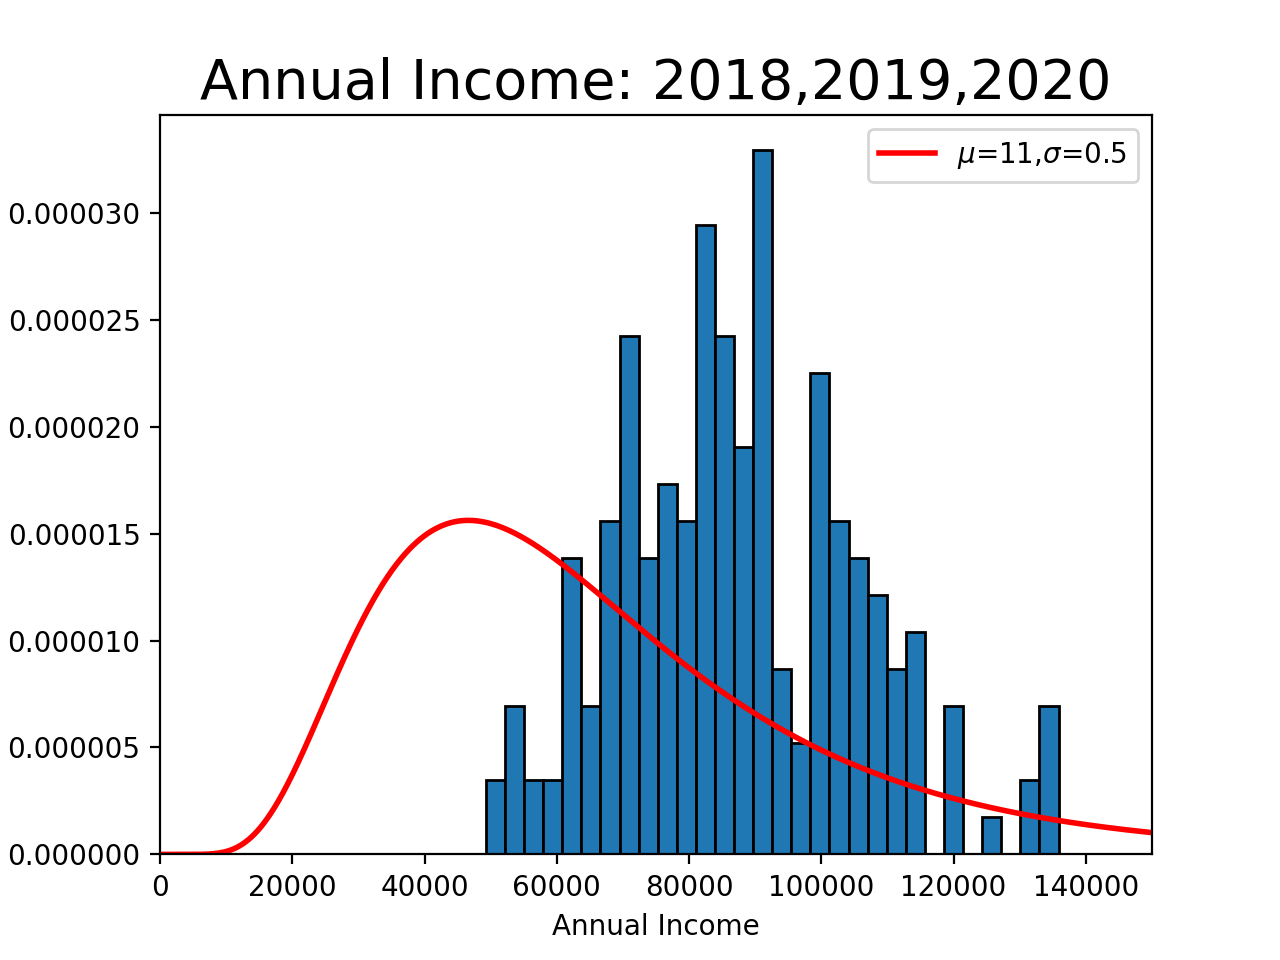

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 150000)

In [45]:
%matplotlib notebook
num_bins = 30
count, bins, ignored = plt.hist(incomes, num_bins, normed=True,
                                edgecolor='k')
plt.title('Annual Income: 2018,2019,2020', fontsize=20)
plt.xlabel(r'Annual Income')
plt.ylabel(r'Percent')
plt.xlim([0,150000])

In [ ]:
#Q1b

In [46]:
def lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, sigma, scale=np.exp(mu))
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.lognorm.cdf(cut_ub, sigma, scale=np.exp(mu))
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.lognorm.cdf(cut_ub, sigma, scale=np.exp(mu)) -
                       sts.lognorm.cdf(cut_lb, sigma, scale=np.exp(mu)))
            
    pdf_vals    = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu) ** 2 / (2 * sigma ** 2))) /
                    prob_notcut)
    
    return pdf_vals

<IPython.core.display.Javascript object>


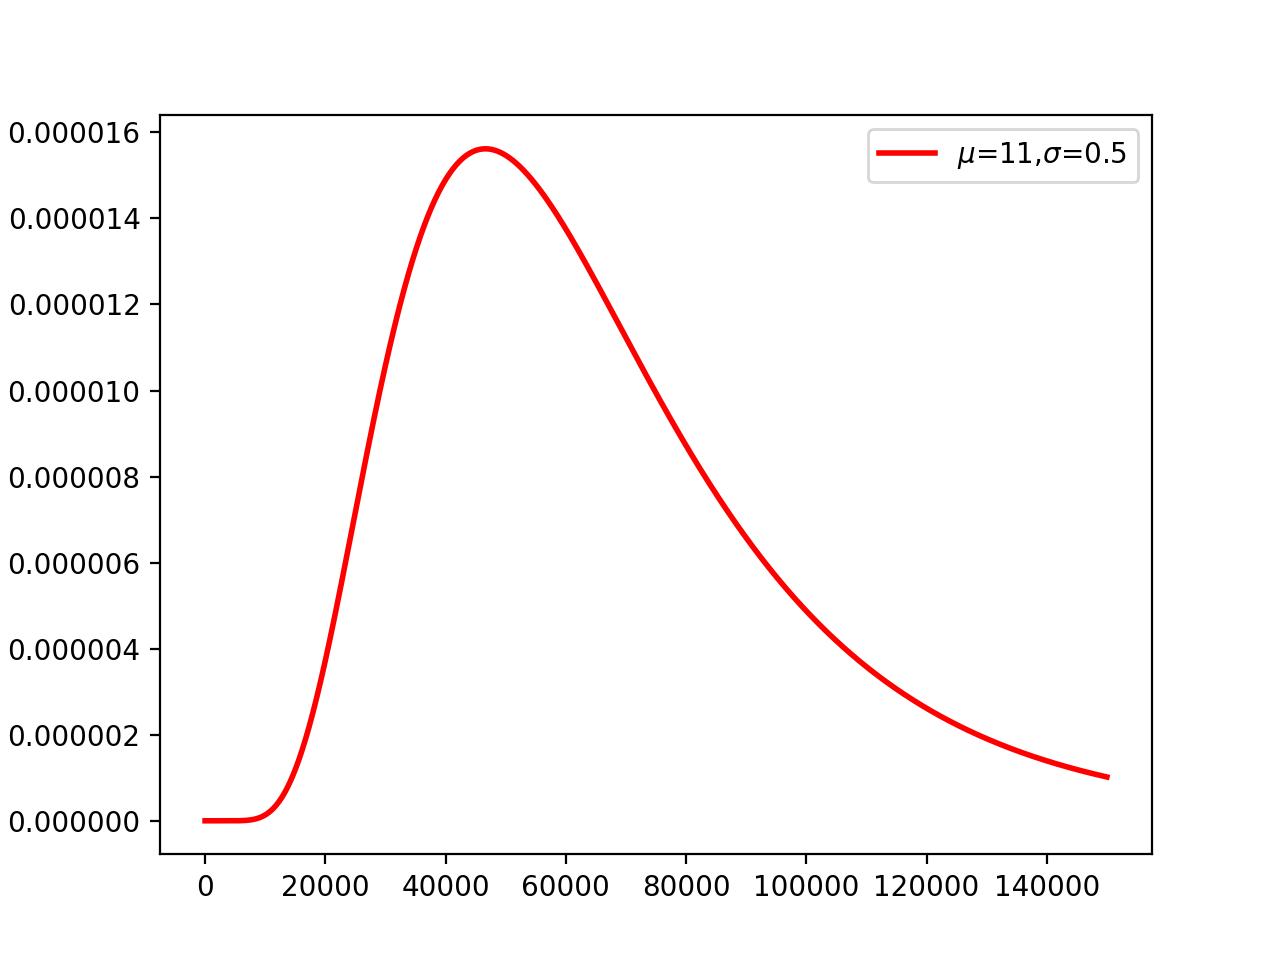

In [50]:
dist_pts = np.linspace(0.01, 150000, 3000)
mu_1 = 11
sig_1 = 0.5
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_1, sig_1,0,150000),
         linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper right')
plt.show()

In [49]:
def log_lik_lognorm(xvals,mu,sigma,cut_lb,cut_ub):
    
    pdf_vals = lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood 1: ', log_lik_lognorm(incomes, mu_1, sig_1, 0, 150000))

Log-likelihood 1:  -2379.120591931827


In [ ]:
#Q1c

In [53]:
def crit(params, *args):
    
    mu, sigma = params
    xvals, cut_lb, cut_ub = args
    log_lik_val = log_lik_lognorm(args[0], mu ,sigma, cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [71]:
mu_init = 16
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = (incomes, 0, 150000)
results_uncstr = opt.minimize(crit, params_init, args=(mle_args))

mu_MLE, sig_MLE = results_uncstr.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print("Maximized Log Likelihood:",log_lik_lognorm(incomes, mu_MLE, sig_MLE, 0, 150000))


mu_MLE= 11.361699969135092  sig_MLE= 0.21174326385847395
Maximized Log Likelihood: -2240.934337511636


<IPython.core.display.Javascript object>


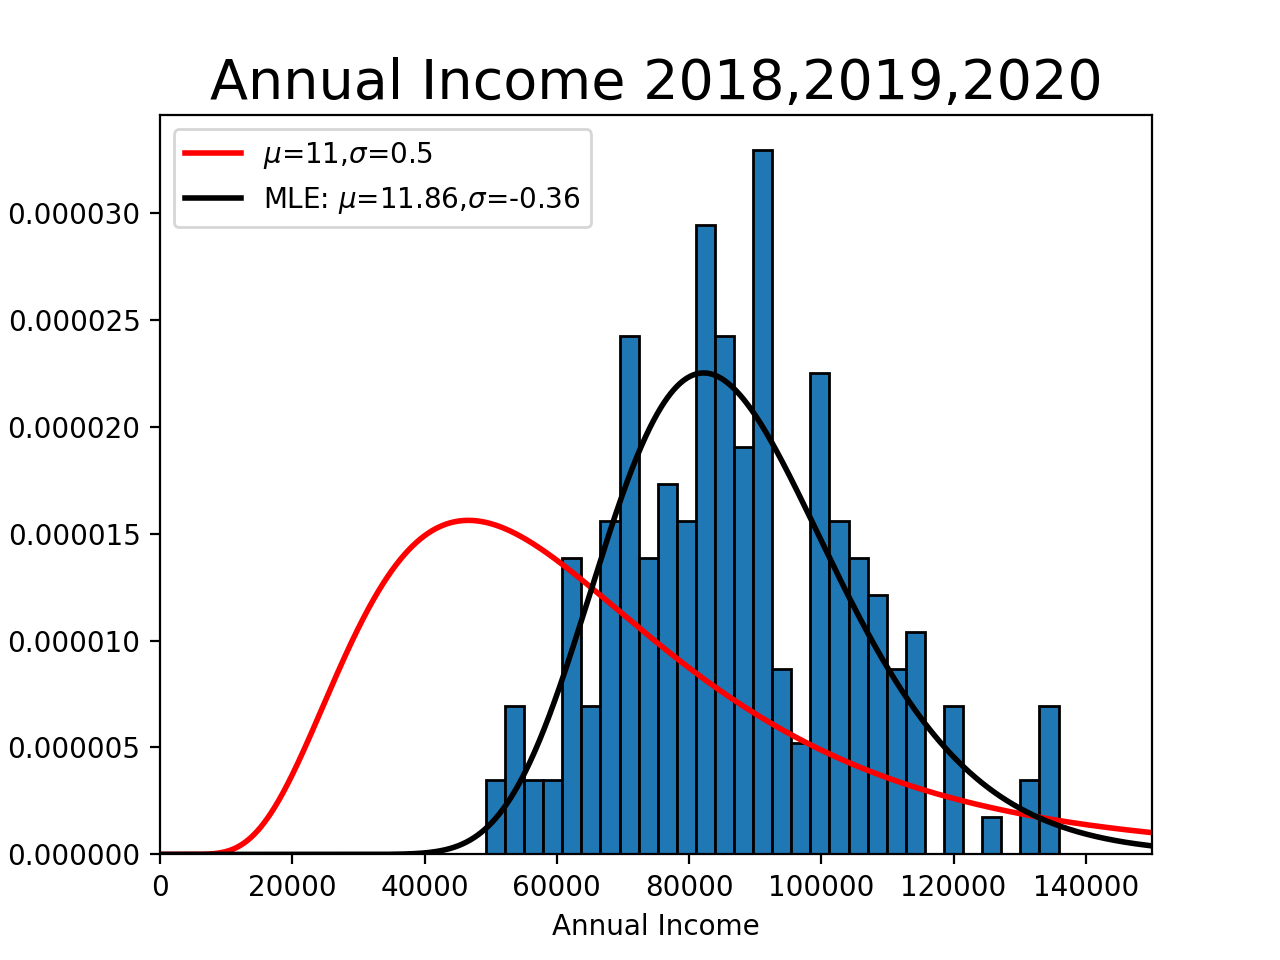

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 150000)

In [75]:
plt.hist(incomes, num_bins, normed=True, edgecolor='k')

plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_1, sig_1, 0, 150000),
         linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_MLE,sig_MLE, 0, 150000),
         linewidth=2, color='k', label='MLE: $\mu$=11.86,$\sigma$=-0.36')
plt.legend(loc='upper left')

plt.title('Annual Income 2018,2019,2020', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Percent')
plt.xlim([0, 150000]) 


In [76]:
vcv_mle = results_uncstr.hess_inv

stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])

In [80]:
print('VCV(MLE) = ', vcv_mle)
print('standard error for mu estimate = ', stderr_mu_mle)
print('standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) =  [[0.000444   0.00017304]
 [0.00017304 0.00015304]]
standard error for mu estimate =  0.02107121612043209
standard error for sigma estimate =  0.012371100810555825


In [81]:
#Q1d

In [85]:
log_lik_h0 = log_lik_lognorm(incomes, mu_1, sig_1,0,150000)
log_lik_mle = log_lik_lognorm(incomes, mu_MLE, sig_MLE,0,150000)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('null hypothesis value log likelihood', log_lik_h0)
print('MLE log likelihood', log_lik_mle)
print('likelihood ratio value', LR_val)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)
print('Due to extremetly small p-value, we can reject the null hypothesis')

hypothesis value log likelihood -2379.120591931827
MLE log likelihood -2240.934337511636
likelihood ratio value 276.3725088403826
chi squared of H0 with 2 degrees of freedom p-value =  0.0
Due to extremetly small p-value, we can reject the null hypothesis


In [ ]:
#Q1e

In [88]:
print('Probability to earn more than $100,000:',1-sts.lognorm.cdf(100000,sig_MLE,scale=np.exp(mu_MLE)))

Probability to earn more than $100,000: 0.23755401146200406


In [89]:
print('Probability to earn less than $75,000:',sts.lognorm.cdf(75000,sig_MLE,scale=np.exp(mu_MLE)))

Probability to earn less than $75,000: 0.25964393212811343


In [ ]:
#Q2a

In [92]:
sick = pd.read_csv('/Users/liujingyang/Desktop/2019_Winter/Computational_Modeling/PS/PS4/sick.txt').astype('float64')

In [107]:
def norm_pdf(xvals, sig):
    pdf_vals = (1/(sig * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - 0)**2 / (2 * sig**2)))
    return pdf_vals

In [108]:
def log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sig):
    
    err = y-b0-b1*x1-b2*x2-b3*x3
    pdf_vals = norm_pdf(err, sig)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

In [109]:
def crit2(params,*args):
    
    b0, b1, b2, b3, sig = params
    y, x1, x2, x3 = args
    log_lik_val = log_lik_norm(y, x1, x2, x3, b0, b1, b2, b3, sig)
    neg_log_lik_val = -log_lik_val 
    
    return neg_log_lik_val

In [110]:
b0_init, b1_init, b2_init, b3_init, sig_init = (0.3,0,0,0,1)
y=sick['sick']
x1, x2, x3 = sick['age'], sick['children'], sick['avgtemp_winter']
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
results = opt.minimize(crit2, params_init, (y, x1, x2, x3))
b0_MLE,b1_MLE, b2_MLE, b3_MLE, sig_MLE = results.x

print('beta0:', b0_MLE)
print('beta1:', b1_MLE)
print('beta2:', b2_MLE)
print('beta3:', b3_MLE)
print('sigma:', sig_MLE)
print('Log-likelihood: ', log_lik_norm(y, x1, x2, x3,b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


beta0: 0.2516466738056031
beta1: 0.012933375689644283
beta2: 0.40050186202851695
beta3: -0.009991691888692016
sigma: 0.0030175361564208623
Log-likelihood:  876.8650463076306


In [111]:
vcv_mle = results.hess_inv
print('VCV(MLE) = ', vcv_mle)

VCV(MLE) =  [[ 3.19135955e-07 -8.26910409e-09  1.70594269e-08 -2.97106819e-10
  -3.20513634e-09]
 [-8.26910409e-09  3.20699152e-09 -2.82972559e-08 -1.72766022e-09
   7.20305092e-10]
 [ 1.70594269e-08 -2.82972559e-08  2.74738644e-07  1.56964777e-08
  -6.10171155e-09]
 [-2.97106819e-10 -1.72766022e-09  1.56964777e-08  1.04000758e-09
  -3.69871616e-10]
 [-3.20513634e-09  7.20305092e-10 -6.10171155e-09 -3.69871616e-10
   1.77097163e-08]]


<IPython.core.display.Javascript object>


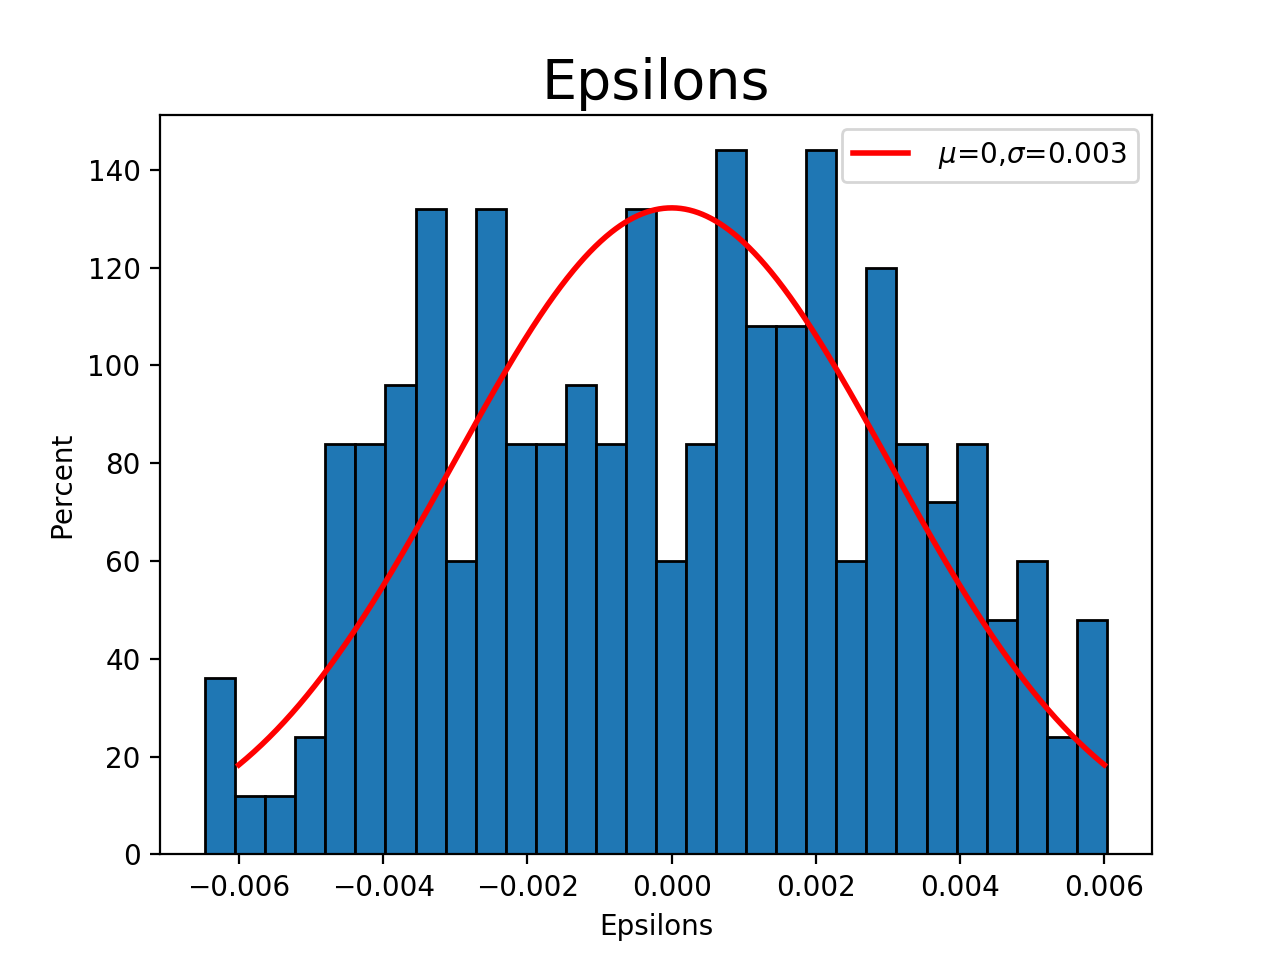

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Percent')

In [118]:
dist2 = np.linspace(-0.006, 0.006, 800)

plt.plot(dist2, norm_pdf(dist2,sig_MLE),
         linewidth=2, color='r', label=' $\mu$=0,$\sigma$=0.003')
plt.legend(loc='upper right')

num_bins = 30
count, bins, ignored = plt.hist(y-b0_MLE-b1_MLE*x1-b2_MLE*x2-b3_MLE*x3, num_bins, normed=True,
                                edgecolor='k')
plt.title('Epsilons', fontsize=20)
plt.xlabel(r'Epsilons')
plt.ylabel(r'Percent')

In [ ]:
#Q2b

In [124]:
b0_t, b1_t, b2_t, b3_t, sig_t = 1, 0, 0, 0, 0.1
log_lik_h0 = log_lik_norm(y, x1, x2, x3, b0_t, b1_t, b2_t, b3_t, sig_t)
log_lik_mle = log_lik_norm(y, x1, x2, x3,b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE)
print('hypothesis value log likelihood', log_lik_h0)
print('MLE log likelihood', -results.fun)
LR_val = 2 * (log_lik_mle2-log_lik_h02)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val2, 5)
print('Chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0)
print('We can reject the null hypothesis that age, number of children, and average winter temperature have no effect on the number of sick days due to the p-value of zero.')

hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.8650463076306
likelihood ratio value 6261.131468699511
Chi squared of H0 with 5 degrees of freedom p-value =  0.0
We can reject the null hypothesis that age, number of children, and average winter temperature have no effect on the number of sick days due to the p-value of zero.
